Regresión lineal

In [17]:
#importamos librerías

import numpy as np 
import pandas as pd

df = pd.read_csv("datasets/sueldos/sueldos.csv")

Conocemos los datos que forman parte del conjunto

In [18]:
print("Tipo: ",type(df))
print("Dimensiones: ",df.shape)

Tipo:  <class 'pandas.core.frame.DataFrame'>
Dimensiones:  (41, 4)


In [21]:
print("INFO:  ")
df.info()

print("\n")
print("**"*20)
print("\n")

print("Describe:  ")
df.describe()

print("\n")
print("**"*20)
print("\n")

print("Describe (transpose):  ")
df.describe().transpose()

INFO:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nombre       41 non-null     object 
 1   apellido     41 non-null     object 
 2   experiencia  41 non-null     float64
 3   sueldo       41 non-null     int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.4+ KB


****************************************


Describe:  


****************************************


Describe (transpose):  


,count,mean,std,min,25%,50%,75%,max
experiencia,41.0,5.941463,3.614206,1.0,2.9,4.9,9.0,13.5
sueldo,41.0,80695.780488,34312.186818,37731.0,54445.0,66029.0,112635.0,148911.0


Representacióin gráfica

(array([5., 9., 6., 4., 3., 2., 4., 3., 2., 3.]),
 array([ 1.  ,  2.25,  3.5 ,  4.75,  6.  ,  7.25,  8.5 ,  9.75, 11.  ,
        12.25, 13.5 ]),
 <BarContainer object of 10 artists>)

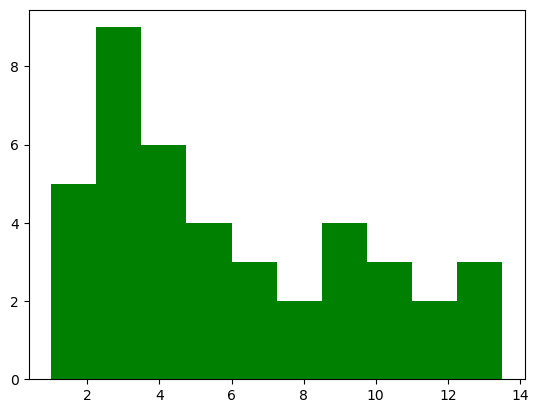

In [36]:
import matplotlib.pyplot as plt

#Histograma de la experiencia

    #bins es con que precisión de agrupación nos dan los datos

plt.hist(df['experiencia'],bins=10, color='green')


(array([10., 12.,  2.,  3.,  6.,  5.,  3.]),
 array([ 37731.        ,  53613.85714286,  69496.71428571,  85379.57142857,
        101262.42857143, 117145.28571429, 133028.14285714, 148911.        ]),
 <BarContainer object of 7 artists>)

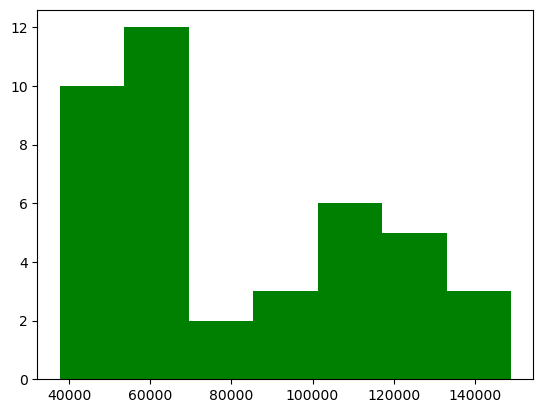

In [37]:


plt.hist(df['sueldo'],bins='auto', color='red')

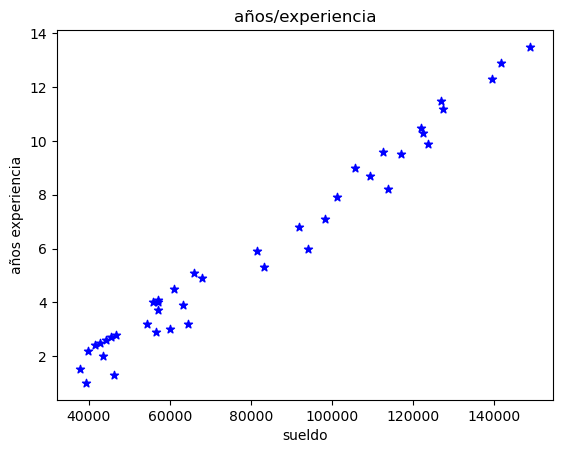

In [43]:
plt.scatter(df['sueldo'], y=df['experiencia'],color='blue', marker='*')
plt.xlabel('sueldo')
plt.ylabel('años experiencia')
plt.title('años/experiencia')
plt.show()

In [49]:
#Limit 5 aleatorio

df.sample(5)

,nombre,apellido,experiencia,sueldo
20,Patricia,Ruiz,4.9,67938
14,Jorge,Rodríguez,3.7,57189
28,Alicia,Vázquez,8.2,113812
22,Sandra,Moreno,5.3,83088
31,Daniel,Serrano,9.5,116969


Creamos los subconjuntos de datos con los que vamos a entrenar el modelo
Conjunto de entrada:

In [55]:
#Cogemos 41 filas (todas) de una única columna, la de index 2

x = df.iloc[:,[2]]

print("Cabecera: \n",x.head())
print("\n")

print("Tipo de la variable x: \n",type(x))
print("\n")

print("Dimensiones de la variable x: \n",x.shape)
print("\n")
     
print("Descripción de la variable x: \n",x.describe())
print("\n")


Cabecera: 
    experiencia
0          1.0
1          1.3
2          1.5
3          2.0
4          2.2


Tipo de la variable x: 
 <class 'pandas.core.frame.DataFrame'>


Dimensiones de la variable x: 
 (41, 1)


Descripción de la variable x: 
        experiencia
count    41.000000
mean      5.941463
std       3.614206
min       1.000000
25%       2.900000
50%       4.900000
75%       9.000000
max      13.500000




Conjunto de salidas (resultados) (Y)

In [62]:
#En lugar de sacar otro dataframe como en el caso anterior df.iloc[:,[2]] ahora sacamos una serie

y1= df.iloc[:,3]
y= df['sueldo']

print("Tipo Y1: ", type(y1))
print("Tipo Y2: ", type(y))

Tipo Y1:  <class 'pandas.core.series.Series'>
Tipo Y2:  <class 'pandas.core.series.Series'>


Conjunto de entrenamiento y conjunto de pruebas

In [91]:
from sklearn.model_selection import train_test_split

#random_state es la semilla, siempre te coge la misma "secuencia aleatoria o secuencia de separación", si la quito cada vez me sale una serie distinta si lo dejo siempre me sale la misma

x_ent, x_pruebas, y_ent, y_pruebas = train_test_split(x,y, test_size=0.3, random_state=1)

print(x_ent.shape)
print(x_pruebas.shape)


(28, 1)
(13, 1)


In [93]:
#entrenamiento

from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(x_ent,y_ent)

LinearRegression()

In [111]:
#Bondad del ajuste
#Sacar el coeficiente de precisión de la predicción va de 0 a 1 cuanto más cerca del 1 mejor

#Primero hacemos la predicción para el conjunto de pruebas

y_pred = modelo.predict(x_pruebas)


from sklearn.metrics import r2_score

print("R2: ",r2_score(y_pruebas, y_pred))


'''x_pred = modelo.predict(y_pruebas)

print("R2: ",r2_score(x_pruebas, x_pred))

ESTO NO FUNCIONA PORQUE PASOS ARRIBA SOLO CREAMOS SETS DE PRUEBAS PARA Y, PARA HACER LA PRUEBA HA DE SER CON SERIES)'''

print("En mi prueba he visto que 4 han cobrado esto: \n",y_pruebas.head(4))

print("Con mi predicción he obtenido esto para los 4 primeros: \n",y_pred[:4])


R2:  0.9703606196203303
En mi prueba he visto que 4 han cobrado esto: 
 3      43525
2      37731
23     81363
38    139465
Name: sueldo, dtype: int64
Con mi predicción he obtenido esto para los 4 primeros: 
 [ 44193.96439919  39556.19480692  80368.56721888 139732.01799991]


In [118]:
pendiente = modelo.coef_
print(pendiente)

[9275.53918454]


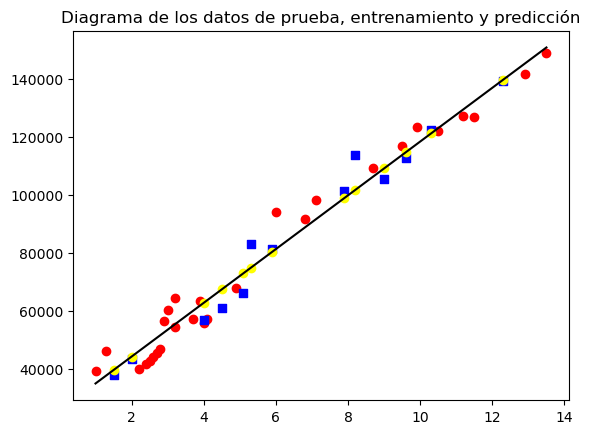

In [130]:
plt.scatter(x_ent, y_ent, color='red')

plt.scatter(x_pruebas, y_pruebas, color='blue', marker='s')

#Para el conjunto de pruebas las predicciones que hemos hecho

plt.scatter(x_pruebas, y_pred, color= 'yellow')

plt.title("Diagrama de los datos de prueba, entrenamiento y predicción")

#Recta de regresión lineal
#Vamos a trazar una recta entre dos puntos
x_min = np.min(x)
x_max = np.max(x)

#Fórmula matemática de la regresión lineal simple:

y_min = pendiente * x_min + ordenada
y_max = pendiente * x_max + ordenada

plt.plot([x_min, x_max],[y_min,y_max], color='black')



In [ ]:
respuesta = modelo.predict([[0]])